# Modeling and Simulation in Python


Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Bigbelly

https://www.youtube.com/watch?v=frix_zTkPEs

If the following import fails, open a terminal and run

`conda install -c conda-forge pysolar`

In [2]:
from pysolar.solar import *

In [3]:
from datetime import datetime, timedelta

In [4]:
dt = datetime.now()

datetime.datetime(2018, 10, 29, 14, 13, 30, 886072)

In [5]:
from pytz import timezone

dt = pytz.timezone('EST').localize(dt)

datetime.datetime(2018, 10, 29, 14, 13, 30, 886072, tzinfo=<StaticTzInfo 'EST'>)

In [6]:
get_altitude(42.2931671, -71.263665, dt)

22.52017419635824

In [7]:
latitude_deg = 42.3
longitude_deg = -71.3
altitude_deg = get_altitude(latitude_deg, longitude_deg, dt)
azimuth_deg = get_azimuth(latitude_deg, longitude_deg, dt)
radiation.get_radiation_direct(dt, altitude_deg)

# result is in Watts per square meter

781.1690621573555

In [8]:
location = State(lat_deg=42.3, lon_deg=-71.3)

,values
lat_deg,42.3
lon_deg,-71.3


In [9]:
dt = datetime(year=2017, month=9, day=15, hour=12, minute=30)
dt = pytz.timezone('EST').localize(dt)

datetime.datetime(2017, 9, 15, 12, 30, tzinfo=<StaticTzInfo 'EST'>)

In [10]:
def compute_irradiance(location, dt):
    degree = UNITS.degree
    watt = UNITS.watt
    meter = UNITS.meter
    
    sun = State(
        altitude_deg = get_altitude(location.lat_deg, location.lon_deg, dt),
        azimuth_deg = get_azimuth(location.lat_deg, location.lon_deg, dt)
    )

    if sun.altitude_deg <= 0:
        irradiance = 0
    else:
        irradiance = radiation.get_radiation_direct(dt, sun.altitude_deg)

    sun.set(irradiance = irradiance * watt / meter**2)
    return sun

In [11]:
sun = compute_irradiance(location, dt)

,values
altitude_deg,48.9295
azimuth_deg,199.128
irradiance,886.7325337613937 watt / meter ** 2


In [12]:
dt = datetime(year=2017, month=9, day=15)
dt = pytz.timezone('EST').localize(dt)

delta_t = timedelta(minutes=15)

result = TimeSeries()
for i in range(24 * 4):
    dt += delta_t
    sun = compute_irradiance(location, dt)
    result[dt] = sun.irradiance.magnitude

result

,values
2017-09-15 00:15:00-05:00,0.000000
2017-09-15 00:30:00-05:00,0.000000
2017-09-15 00:45:00-05:00,0.000000
2017-09-15 01:00:00-05:00,0.000000
2017-09-15 01:15:00-05:00,0.000000
2017-09-15 01:30:00-05:00,0.000000
2017-09-15 01:45:00-05:00,0.000000
2017-09-15 02:00:00-05:00,0.000000
2017-09-15 02:15:00-05:00,0.000000
2017-09-15 02:30:00-05:00,0.000000


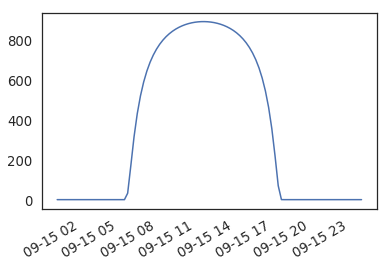

In [13]:
result.plot()

In [14]:
cm = UNITS.centimeter
meter = UNITS.meter
watt = UNITS.watt
second = UNITS.second
joule = UNITS.joule

<Unit('joule')>

In [15]:
width = 45 * cm

<Quantity(45, 'centimeter')>

In [16]:
area = width**2

<Quantity(2025, 'centimeter ** 2')>

In [17]:
power = sun.irradiance * area

<Quantity(0.0, 'centimeter ** 2 * watt / meter ** 2')>

In [18]:
area = area.to(meter**2)

<Quantity(0.2025, 'meter ** 2')>

In [19]:
power = sun.irradiance * area

<Quantity(0.0, 'watt')>

In [20]:
delta_t = 1 * second
energy = power * delta_t

<Quantity(0.0, 'second * watt')>

In [21]:
energy.to(joule)

<Quantity(0.0, 'joule')>